# House Price Prediction: Advanced Regression Techniques: Pre-processing and Training Data Development

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

<IPython.core.display.Javascript object>

Load in data from both train and test splits. Standardize the data and then perform PCA for feature selection and dimensionality reduction

In [3]:
train_set = pd.read_csv("new_training_set.csv")
test_set = pd.read_csv("new_test_set.csv")

<IPython.core.display.Javascript object>

In [4]:
train_set.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,...,Exterior1st_NaN,Exterior2nd_NaN,MasVnrType_None,Foundation_PConc,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_NaN,SaleType_New,SaleCondition_Partial
0,7,2003,2003,196.0,3.0,3.0,3.0,706.0,856.0,4.0,...,0,0,0,1,0,0,0,0,0,0
1,6,1976,1976,0.0,2.0,3.0,0.0,978.0,1262.0,4.0,...,0,0,1,0,0,0,0,0,0,0
2,7,2001,2002,162.0,3.0,3.0,2.0,486.0,920.0,4.0,...,0,0,0,1,0,0,0,0,0,0
3,7,1915,1970,0.0,2.0,2.0,3.0,216.0,756.0,3.0,...,0,0,1,0,1,0,1,0,0,0
4,8,2000,2000,350.0,3.0,3.0,1.0,655.0,1145.0,4.0,...,0,0,0,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

In [5]:
test_set.head()

,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinSF1,TotalBsmtSF,HeatingQC,...,Exterior1st_NaN,Exterior2nd_NaN,MasVnrType_None,Foundation_PConc,GarageType_Detchd,GarageFinish_Fin,GarageFinish_Unf,SaleType_NaN,SaleType_New,SaleCondition_Partial
0,5,1961,1961,0.0,2.0,2.0,3.0,468.0,882.0,2.0,...,0,0,1,0,0,0,1,0,0,0
1,6,1958,1958,108.0,2.0,2.0,3.0,923.0,1329.0,2.0,...,0,0,0,0,0,0,1,0,0,0
2,5,1997,1998,0.0,2.0,3.0,3.0,791.0,928.0,3.0,...,0,0,1,1,0,1,0,0,0,0
3,6,1998,1998,20.0,2.0,2.0,3.0,602.0,926.0,4.0,...,0,0,0,1,0,1,0,0,0,0
4,8,1992,1992,0.0,3.0,3.0,3.0,263.0,1280.0,4.0,...,0,0,1,1,0,0,0,0,0,0


<IPython.core.display.Javascript object>

Now the datasets is loaded into their own separate dataframes we will continue on to the Standardization <br>
First separate the data into X_train, y_train, X_test, and y_test splits separating the target variable from the rest of the data.

In [6]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target variable (y) in train_set
X = train_set.drop(columns=["SalePrice"])
y = train_set["SalePrice"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

<IPython.core.display.Javascript object>

Here the standard scaler object will be instantiated and fit to the training data. Which will then allow us to transform the test data

In [7]:
# Train the StandardScaler on the training features (X_train)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# Transform both the training features (X_train) and testing features (X_test) using the trained scaler
X_test_std = scaler.transform(X_test)

<IPython.core.display.Javascript object>

The test_set that will be used only for final evaluation of models also needs to be normalized and then do PCA as well. Drop the target variable from this before transforming.

In [8]:
test_set_no_target = test_set.drop(columns=["SalePrice"])
final_eval_set = scaler.transform(test_set_no_target)

<IPython.core.display.Javascript object>

Now that the data has been standardized we will take a look at a histogram of the square feet area of homes before moving on to PCA 

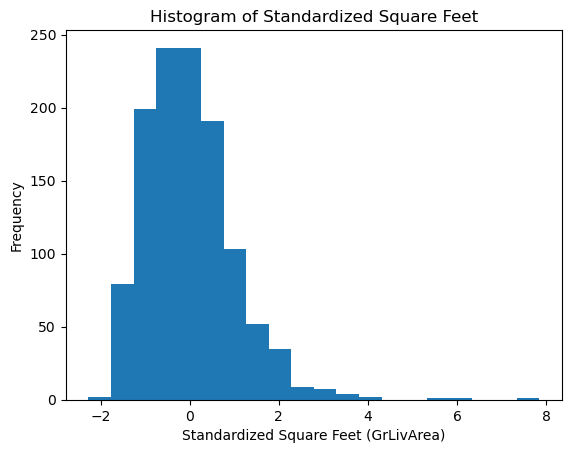

<IPython.core.display.Javascript object>

In [9]:
# Find the column index of the square feet feature (GrLivArea) using iloc
sqft_feature_index = X_train.columns.get_loc("GrLivArea")

# Plot the histogram for the square feet feature
plt.hist(X_train_std[:, sqft_feature_index], bins=20)
plt.xlabel("Standardized Square Feet (GrLivArea)")
plt.ylabel("Frequency")
plt.title("Histogram of Standardized Square Feet")
plt.show()

Instantiate PCA and set n_components to 0.9 to retain enough principal components to explain 90% of the variance in the data.

In [10]:
pca = PCA(n_components=8)

# Fit and transform the standardized training data
X_train_pca = pca.fit_transform(X_train_std)

# Transform the standardized test data using the same PCA transformation
X_test_pca = pca.transform(X_test_std)

final_eval_pca = pca.transform(final_eval_set)

<IPython.core.display.Javascript object>

The explained_variance_ratio_ variable contains the proportion of total variance explained by each principal component. By cumulatively summing these ratios, we can understand the cumulative variance explained by a given number of principal components.

In [11]:
# Variance explained
explained_variance = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = np.cumsum(explained_variance)

explained_variance

array([0.35795147, 0.09257084, 0.06792183, 0.06251102, 0.05045082,
       0.04854273, 0.03486216, 0.0316015 ])

<IPython.core.display.Javascript object>

# PCA Visualizations

Below are two plots that illustrate the importance of principal components in our data. The first plot shows the explained variance ratio by each individual principal component, helping us understand how much information each component captures on its own. The second plot displays the cumulative explained variance, which allows us to visualize how much of the total variance in the data is accounted for as we include additional principal components. These plots will aid in determining the optimal number of principal components to retain while preserving the most significant information from the original data

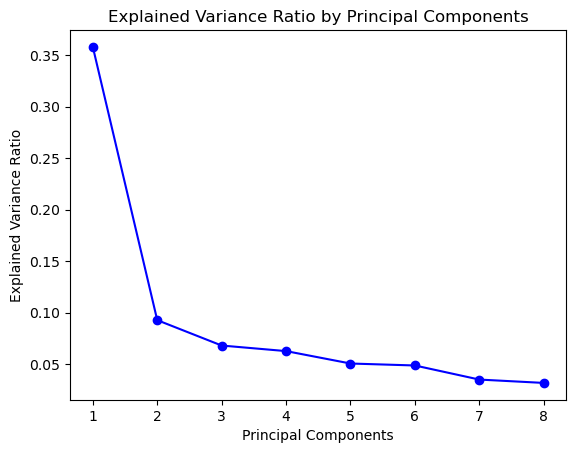

<IPython.core.display.Javascript object>

In [12]:
plt.plot(range(1, len(explained_variance) + 1), explained_variance, "bo-")
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance Ratio by Principal Components")
plt.show()

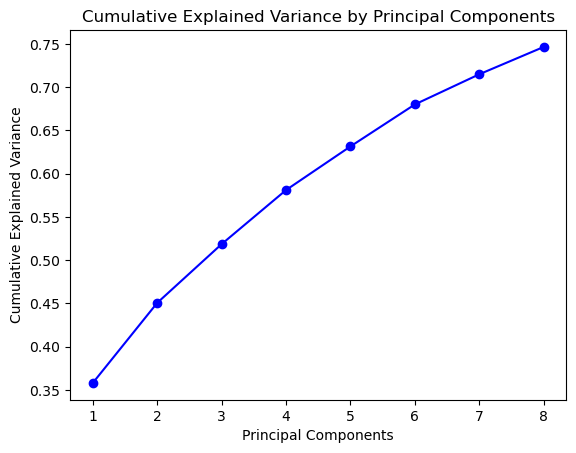

<IPython.core.display.Javascript object>

In [13]:
# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, "bo-")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.show()

 It takes 8 components to explain approximately 75.64% of the total variance in the dataset. These 8 components collectively capture a substantial amount of the variability present in the original features, suggesting they are valuable for predicting the target variable, sales price. On the other hand, the remaining components beyond the first 8 contribute relatively less to the overall variance explained. By focusing on these 8 important components, we can effectively reduce the dimensionality of the data while retaining key information for predicting house prices.

# Save the datasets

In [14]:
# Convert transformed arrays to dataframes
X_train_pca_df = pd.DataFrame(X_train_pca)
X_test_pca_df = pd.DataFrame(X_test_pca)
final_eval_pca_df = pd.DataFrame(final_eval_pca)

# Save dataframes to CSV files
X_train_pca_df.to_csv("X_train_pca.csv", index=False)
X_test_pca_df.to_csv("X_test_pca.csv", index=False)
final_eval_pca_df.to_csv("final_eval_pca.csv", index=False)

# Save the target variable for the training data to a CSV file
y_train.to_csv("y_train.csv", index=False)

# Save the target variable for the testing data to a CSV file
y_test.to_csv("y_test.csv", index=False)

<IPython.core.display.Javascript object>

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select the 'GrLivArea' feature as the predictor
X_train_sqft = X_train['GrLivArea'].values.reshape(-1, 1)
X_test_sqft = X_test['GrLivArea'].values.reshape(-1, 1)

# Create a linear regression object
regr = LinearRegression()

# Fit the model to the training data
model = regr.fit(X_train_sqft, y_train)

# Make predictions on the test set
y_pred_sqft = model.predict(X_test_sqft)

# Calculate RMSE
rmse_sqft = np.sqrt(mean_squared_error(y_test, y_pred_sqft))
print("Root Mean Squared Error (RMSE) for Linear Regression with Square Feet only:", rmse_sqft)

# Calculate R-squared
r2_sqft = r2_score(y_test, y_pred_sqft)
print("R-squared for Linear Regression with Square Feet only:", r2_sqft)


Root Mean Squared Error (RMSE) for Linear Regression with Square Feet only: 58471.75652552955
R-squared for Linear Regression with Square Feet only: 0.5542632452871117


<IPython.core.display.Javascript object>

This is the baseline using only a very highly correlated feature as the predictor. We will compare this baseline to the models created in the next notebook to see how well we can predict sales price.